In [ ]:
# day34_The Trivia API and The Quizzler App_240812

In [ ]:
import requests

# ?amount=10&category=18&type=boolean
parameters = {
    "amount": 10,
    "category": 18,
    "type": "boolean"
}

response = requests.get(url="https://opentdb.com/api.php", params=parameters)
response.raise_for_status()
data = response.json()["results"]
question_data = data

In [ ]:
# HTML Entities
# https://www.w3schools.com/html/html_entities.asp
# a way of placing certain characters in html
# https://www.freeformatter.com/html-escape.html#before-output > copy&paste > Unescape HTML
# import html
# html.unescape()

In [1]:
# data types: int, str, float, bool
x = int(3.14)
print(x)  # Dynamic Typing

3


In [11]:
# age: int
# name: str
# height: float
# is_human: bool

def police_check(age):
    if age > 18:
        can_drive = True
    else:
        can_drive = False
    return can_drive

if police_check(12):
    print("You may pass")
else:
    print("Pay a fine.")

Pay a fine.


In [13]:
if police_check("twelve"):  # mistake
    print("You may pass")
else:
    print("Pay a fine.")

# the easiest way to prevent this mistake is declaring the type of the input
def police_check(age: int):
    if age > 18:
        can_drive = True
    else:
        can_drive = False
    return can_drive

# we can also declare the type of the output
def police_check(age: int) -> bool:
    if age > 18:
        can_drive = True
    else:
        can_drive = False
    return "They can drive"  # this part becomes highlighted

# This is called 'Type Hints' in Python

TypeError: '>' not supported between instances of 'str' and 'int'

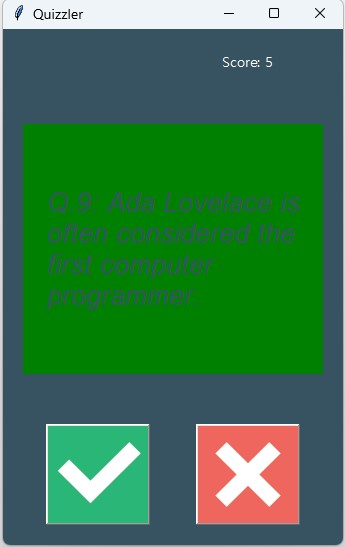

In [14]:
# final project_quizzler app
from PIL import Image
from IPython.display import display
img = Image.open('quizzler_240812.jpg')
display(img)

In [ ]:
# main.py
from question_model import Question
from data import question_data
from quiz_brain import QuizBrain
from ui import QuizInterface

question_bank = []
for question in question_data:
    question_text = question["question"]
    question_answer = question["correct_answer"]
    new_question = Question(question_text, question_answer)
    question_bank.append(new_question)


quiz = QuizBrain(question_bank)
quiz_ui = QuizInterface(quiz)

print("You've completed the quiz")
print(f"Your final score was: {quiz.score}/{quiz.question_number}")

In [ ]:
# data.py
import requests

# ?amount=10&category=18&type=boolean
parameters = {
    "amount": 10,
    "category": 18,
    "type": "boolean"
}

response = requests.get(url="https://opentdb.com/api.php", params=parameters)
response.raise_for_status()
data = response.json()["results"]
question_data = data

In [ ]:
# quiz_brain.py
import html

class QuizBrain:

    def __init__(self, q_list):
        self.question_number = 0
        self.score = 0
        self.question_list = q_list
        self.current_question = None

    def still_has_questions(self):
        return self.question_number < len(self.question_list)

    def next_question(self):
        self.current_question = self.question_list[self.question_number]
        self.question_number += 1
        q_text = html.unescape(self.current_question.text)
        return f"Q.{self.question_number}: {q_text}"
        # user_answer = input(f"Q.{self.question_number}: {q_text} (True/False): ")
        # self.check_answer(user_answer)

    def check_answer(self, user_answer):
        correct_answer = self.current_question.answer
        if user_answer.lower() == correct_answer.lower():
            self.score += 1
            return True
        else:
            return False

In [ ]:
# ui.py
from tkinter import *
from quiz_brain import QuizBrain
THEME_COLOR = "#375362"


class QuizInterface:
    def __init__(self, quiz_brain: QuizBrain):  # to add the datatype when you create it as a parameter
        self.quiz = quiz_brain

        self.window = Tk()
        self.window.title("Quizzler")
        self.window.config(padx=20, pady=20, bg=THEME_COLOR)

        self.score_label = Label(text="Score: 0", fg="white", bg=THEME_COLOR)
        self.score_label.grid(row=0, column=1)

        # Canvas
        self.canvas = Canvas(width=300, height=250, bg="white", highlightthickness=0)
        self.question_text = self.canvas.create_text(150, 125, width=280,
                                                 text="Hello word!",
                                                 fill=THEME_COLOR,
                                                 font=("Arial", 20, "italic"))
        self.canvas.grid(row=1, column=0, columnspan=2, pady=50)

        # Buttons
        self.true_img = PhotoImage(file="images/true.png")
        self.true_button = Button(image=self.true_img, highlightthickness=0, command=self.true_pressed)
        self.true_button.grid(row=2, column=0)

        self.false_img = PhotoImage(file="images/false.png")
        self.false_button = Button(image=self.false_img, highlightthickness=0, command=self.false_pressed)
        self.false_button.grid(row=2, column=1)

        self.get_next_question()

        self.window.mainloop()

    def get_next_question(self):
        self.canvas.config(bg="white")
        if self.quiz.still_has_questions():
            self.score_label.config(text=f"Score: {self.quiz.score}")
            q_text = self.quiz.next_question()
            self.canvas.itemconfig(self.question_text, text=q_text)
        else:
            self.canvas.itemconfig(self.question_text, text="You've reached the end of the quiz.")
            self.true_button.config(state="disabled")
            self.false_button.config(state="disabled")

    def true_pressed(self):
        self.give_feedback(self.quiz.check_answer("True"))

    def false_pressed(self):
        self.give_feedback(self.quiz.check_answer("False"))

    def give_feedback(self, is_right):
        if is_right:
            self.canvas.config(bg="green")
        else:
            self.canvas.config(bg="red")
        self.window.after(1000, self.get_next_question)